# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [3]:
import psycopg2
import pandas as pd

In [13]:
tables = {'hr_dataset':None,'production_staff':None,
         'recruiting_costs':None,
         'salary_grid':None}

In [14]:
pg_connection = {
    'host': 'dsstudents.skillbox.ru',
    'port': '5432',
    'dbname': 'human_resources',
    'user': 'readonly',
    'password': '6hajV34RTQfmxhS'
}

In [15]:
conn = psycopg2.connect(**pg_connection)
conn

<connection object at 0x0000012D5ECE8E10; dsn: 'user=readonly password=xxx dbname=human_resources host=dsstudents.skillbox.ru port=5432', closed: 0>

In [24]:
def info(table, conn):
    sql_str = f"SELECT * FROM {table} LIMIT 5;"
    df = pd.read_sql_query(sql_str, conn)
    return df
for table in tables:
    tables[table] = info(table, conn)
tables['hr_dataset']

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [25]:
tables['production_staff']

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0,0,0,0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0,0,0,0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0,0,0,0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0,0,0,0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0,0,0,0


In [26]:
tables['recruiting_costs']

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
tables['salary_grid']

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45


## 1. Гипотезы

### Зависимость производительности ("Performance Score)"от


брачного статуса;
региона проживания;
количества отработанных лет;
руководителя;
наёмной компании.

In [33]:
tables['production_staff']['Performance Score'].unique()

array(['Fully Meets', 'Exceeds'], dtype=object)

#### От кол-ва отработанных лет

In [41]:
sql_str = 'SELECT DISTINCT perf_scoreid, "Performance Score" FROM  hr_dataset ORDER BY 1;'
perf_score  = pd.read_sql_query(sql_str, conn)
perf_score

,perf_scoreid,Performance Score
0,0,90-day meets
1,1,PIP
2,2,Needs Improvement
3,3,Fully Meets
4,4,Exceeds
5,5,Exceptional
6,9,N/A- too early to review


 Возможные варианты производительности
 * 3,4,5 - хорошая производительность

In [46]:
sql_str = 'SELECT DISTINCT maritalstatusid,maritaldesc FROM hr_dataset ORDER BY 1;'
marital = pd.read_sql_query(sql_str,conn)
marital

,maritalstatusid,maritaldesc
0,0,Single
1,1,Married
2,2,Divorced
3,3,Separated
4,4,Widowed


In [49]:
sql_str = 'SELECT DISTINCT state FROM hr_dataset ORDER BY state;'
states = pd.read_sql_query(sql_str,conn)
states.head()
# все регионы

,state
0,AL
1,AZ
2,CA
3,CO
4,CT


In [52]:
sql_str = 'SELECT DISTINCT "Manager Name" FROM hr_dataset ORDER BY 1';
managers = pd.read_sql_query(sql_str,conn)
managers
#Руководители

,Manager Name
0,Alex Sweetwater
1,Amy Dunn
2,Board of Directors
3,Brandon R. LeBlanc
4,Brannon Miller
5,Brian Champaigne
6,David Stanley
7,Debra Houlihan
8,Elijiah Gray
9,Eric Dougall


In [56]:
sql_str = 'SELECT "Employment Source" FROM recruiting_costs ORDER BY 1;'
emp_source = pd.read_sql_query(sql_str,conn)
emp_source
# все наемные компании

,Employment Source
0,Billboard
1,Careerbuilder
2,Company Intranet - Partner
3,Diversity Job Fair
4,Employee Referral
5,Glassdoor
6,Information Session
7,Internet Search
8,MBTA ads
9,Monster.com


Построим корреляция по формуле Спирмена для всех признаков. Кол-во отработанных дней переведем в качественный признак с разбиением на интервалы (1год = 1 интервал)

In [60]:
sql_str = '''SELECT perf_scoreid,maritalstatusid,"Days Employed" as days_employed,"Days Employed"/365  as years_employed, state, "Manager Name" as manager_name, 
"Employee Source" as employee_source 
FROM hr_dataset 
WHERE (perf_scoreid < 9)
ORDER BY 1;'''
main_df = pd.read_sql_query(sql_str,conn)
main_df.head()

,perf_scoreid,maritalstatusid,days_employed,years_employed,state,manager_name,employee_source
0,0,0,2211,6,MA,Kissy Sullivan,Newspager/Magazine
1,0,0,309,0,MA,Simon Roup,Vendor Referral
2,0,1,1056,2,MA,Simon Roup,Glassdoor
3,0,1,1908,5,MA,Elijiah Gray,Monster.com
4,0,0,2148,5,MA,Alex Sweetwater,Monster.com


In [63]:
from scipy.stats import spearmanr as qual_corr
# импортируем библиотеку для расчета корреляции Спирмена

In [69]:
for col in main_df.columns[1:]:
    print(f'Correlation with {col}:\t {qual_corr(main_df.perf_scoreid,main_df[col]).correlation}')
# мы видим список признаков которые влияют. Кол-во отработанных лет, HR-компании
#и руководители показали хорошие хар-ки. Остальные нам не интересны   
    

Correlation with maritalstatusid:	 0.00903570795588563
Correlation with days_employed:	 0.18835498785836924
Correlation with years_employed:	 0.1952250940605742
Correlation with state:	 0.009294728310753227
Correlation with manager_name:	 -0.12103581493531973
Correlation with employee_source:	 -0.09220636878364805


### Зависимость от количества отработанных дней

In [70]:
from matplotlib import pyplot as plt
%matplotlib inline

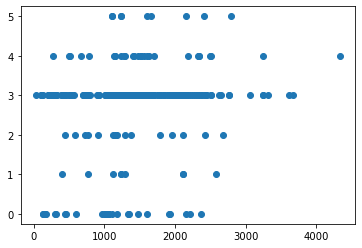

In [75]:
plt.scatter(main_df.days_employed,main_df.perf_scoreid)

По графику не особо понятно и сложно сделать вывод. Посмотрим отношение в %

In [77]:
sql_str = '''SELECT perf_scoreid, COUNT(*) FROM hr_dataset WHERE perf_scoreid < 9
GROUP BY 1 ORDER BY 1;'''
pers_relations = pd.read_sql_query(sql_str,conn)
pers_relations

,perf_scoreid,count
0,0,31
1,1,9
2,2,15
3,3,181
4,4,28
5,5,9


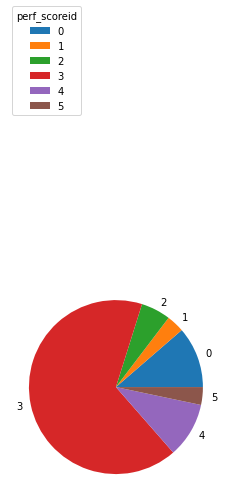

In [92]:
# построим pie график
fig, sub = plt.subplots()

widges, text = sub.pie(pers_relations['count'],explode=None,labels = pers_relations.perf_scoreid)

sub.legend(widges,pers_relations.perf_scoreid,
              title = "perf_scoreid",
               loc = "center left",
               bbox_to_anchor = {1.5, 0, 0.5, 1}
               )

Отразим данные на годовой динамике

In [95]:
sql_str = '''
SELECT perf_scoreid,"Days Employed"/365 as years_employed,
COUNT(*)
FROM hr_dataset
WHERE perf_scoreid < 9
GROUP BY 1,2
ORDER BY 1,2;
'''
pers_years = pd.read_sql_query(sql_str,conn)
pers_years.head()

,perf_scoreid,years_employed,count
0,0,0,6
1,0,1,3
2,0,2,11
3,0,3,4
4,0,4,2


In [100]:
sql_str = '''
SELECT "Days Employed"/365 as years_employed, COUNT(*)
FROM hr_dataset
WHERE perf_scoreid < 9
GROUP BY 1
ORDER BY 1;
'''
years_count = pd.read_sql_query(sql_str,conn)
years_count.head()

,years_employed,count
0,0,24
1,1,29
2,2,31
3,3,69
4,4,47


In [101]:
years_count.columns = ('years_employed','ppl')
years_count

,years_employed,ppl
0,0,24
1,1,29
2,2,31
3,3,69
4,4,47
5,5,34
6,6,24
7,7,7
8,8,4
9,9,2


In [104]:
pers_years = pd.merge(pers_years,years_count)
pers_years.head()

,perf_scoreid,years_employed,count,ppl
0,0,0,6,24
1,3,0,17,24
2,4,0,1,24
3,0,1,3,29
4,1,1,1,29


In [110]:
pers_years['percent'] = pers_years['count']*100./pers_years['ppl']
pers_years.head()

,perf_scoreid,years_employed,count,ppl,percent
0,0,0,6,24,25.000000
1,3,0,17,24,70.833333
2,4,0,1,24,4.166667
3,0,1,3,29,10.344828
4,1,1,1,29,3.448276


In [112]:
pers_years.sort_values(['years_employed', 'perf_scoreid'],inplace=True)
pers_years.head()

,perf_scoreid,years_employed,count,ppl,percent
0,0,0,6,24,25.000000
1,3,0,17,24,70.833333
2,4,0,1,24,4.166667
3,0,1,3,29,10.344828
4,1,1,1,29,3.448276


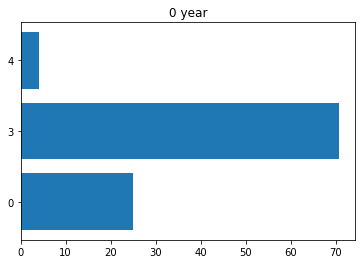

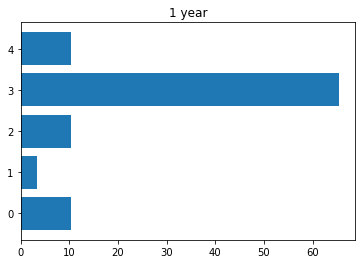

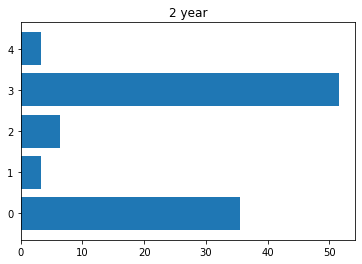

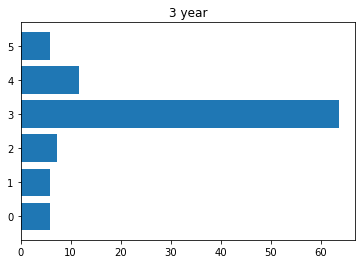

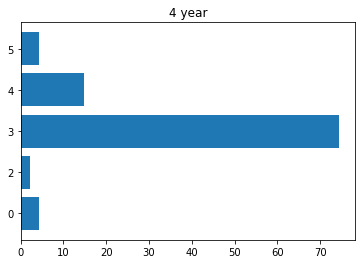

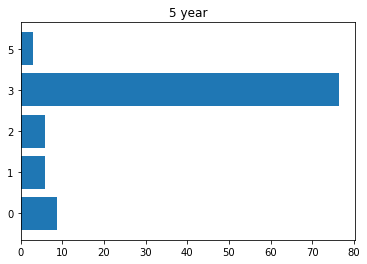

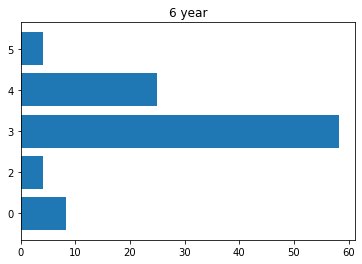

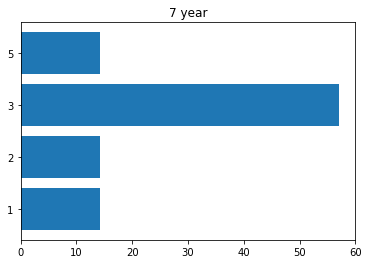

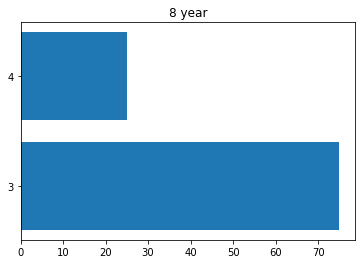

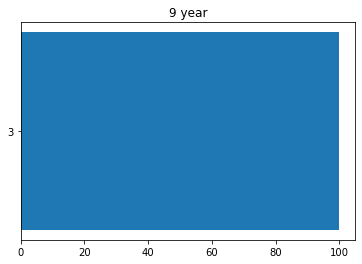

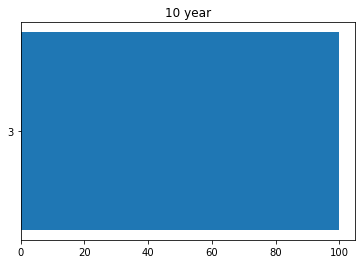

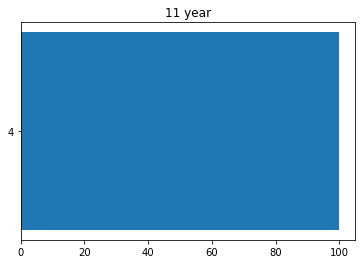

In [116]:
for i in range(12):
    fig, sub = plt.subplots()
    df = pers_years[pers_years.years_employed == i]
    sub.barh(list(map(str,df.perf_scoreid)),df.percent)
    sub.set_title(f'{i} year')
    plt.show()

Из гистограммы сверху можно сделать вовод, что на начальном этапе до первого года сотрудники работают усердно. После первого года появляются люди, которых переводят на 90дневные испытательные сроки. После 2х лет работы видим пик неуспевающих. После 3го года неупевающих и испытательного срока становится меньше. После 4го года еще меньше. После 7ми лет работает мало людей и все продуктивно. <br>
Успешные сотрудники стабильно работают и показывают высокий уровень.
После 2го года производительность падает, но восстанавлиется к 6 году.

<br>
Мы можем понять, на каких этапах нужно усилить контроль. После 2го года лучше всего обращать внимание на сотрудников.

### Зависимость от количества отработанных дней

In [120]:
# уделим внимание каждому менеджеру
sql_str = '''
SELECT "Manager Name" as manager, perf_scoreid,COUNT(*)
FROM hr_dataset
WHERE perf_scoreid < 9
GROUP BY 1,2
ORDER BY 1,2;
'''
pers_manager = pd.read_sql_query(sql_str,conn)
pers_manager.head()

,manager,perf_scoreid,count
0,Alex Sweetwater,0,2
1,Alex Sweetwater,2,1
2,Alex Sweetwater,3,4
3,Alex Sweetwater,4,1
4,Alex Sweetwater,5,1


## ЗАДАНИЕ 2


Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [ ]:
### YOUR CODE HERE ###


